# 6.4 REGRESSION ANALYSIS - Supervised machine Learning

## This script contains the following
### 1. Importing libraries and Data
### 2. Data cleaning
### 3. Data preparation  for Regression Analysis
### 4. Regression Analysis

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# ensuring that the graphs and plots are displayed within the Notebook with the neeed to "call" them
%matplotlib inline

In [3]:
# Defining the path
path = r'C:\Users\user\Waiting times for priority procedures'

In [4]:
path

'C:\\Users\\user\\Waiting times for priority procedures'

In [5]:
# importing the datasets
# importing the main dataset
df_wait = pd.read_csv(os.path.join(path,'1.Data', 'Prepared data','wait_time_Transformed.csv' ))

In [6]:
# Importing the benchmarked dataset
df_bm = pd.read_csv(os.path.join(path,'1.Data', 'Prepared data','wait_time_benchmarked.csv' ))

## 2. Cleaning the dataset

In [7]:
df_wait.columns

Index(['state', 'medical_procedure', 'year', '%meeting_benchmark',
       '50th_percentile_days', '90th_percentile_days', 'total_cases'],
      dtype='object')

In [79]:
df_bm.columns

Index(['state', 'medical_procedure', 'year', '%meeting_benchmark',
       '50th_percentile_days', '90th_percentile_days', 'total_cases'],
      dtype='object')

In [80]:
# changing the column heading to more understandable heads
df_wait.rename(columns = {'50th_percentile_days':'median_days','90th_percentile_days':'maximum_days'},inplace=True)
df_bm.rename(columns = {'50th_percentile_days':'median_days','90th_percentile_days':'maximum_days'},inplace=True)

In [10]:
# checking column heads
df_wait.head()

,state,medical_procedure,year,%meeting_benchmark,median_days,maximum_days,total_cases
0,Alberta,Bladder Cancer Surgery,2013,NA,28,57,477
1,Alberta,Bladder Cancer Surgery,2014,NA,29,64,488
2,Alberta,Bladder Cancer Surgery,2015,NA,28,70,542
3,Alberta,Bladder Cancer Surgery,2016,NA,30,70,448
4,Alberta,Bladder Cancer Surgery,2017,NA,30,69,573


In [81]:
df_bm.head()

,state,medical_procedure,year,%meeting_benchmark,median_days,maximum_days,total_cases
0,Alberta,CABG,2008,99.0,7,83,511
1,Alberta,CABG,2009,93.0,17,156,665
2,Alberta,CABG,2010,95.0,15,133,590
3,Alberta,CABG,2011,95.0,15,134,369
4,Alberta,Cataract Surgery,2008,71.0,70,199,8662


In [22]:
df_wait.shape

(1487, 7)

In [82]:
df_bm.shape

(781, 7)

### Missing Values

In [14]:
df_wait.isnull().sum()
# no missing values

state                 0
medical_procedure     0
year                  0
%meeting_benchmark    0
median_days           0
maximum_days          0
total_cases           0
dtype: int64

In [83]:
df_bm.isnull().sum()
# no missing values either

state                 0
medical_procedure     0
year                  0
%meeting_benchmark    0
median_days           0
maximum_days          0
total_cases           0
dtype: int64

### Duplicates Check

In [16]:
dups = df_wait.duplicated()

In [18]:
dups.shape #no duplicates

(1487,)

In [84]:
dups_2 = df_bm.duplicated()

In [85]:
dups_2.shape #no duplicates

(781,)

### Extreme value check

#### for our regression analysis we need to explore the relationship between the median waiting time and the total number of cases
#### But first we need to check any extreme values in the dependant variable and the independant variable


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_days', ylabel='Density'>

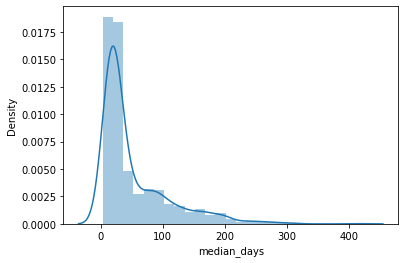

In [25]:
sns.distplot(df_wait['median_days'], bins=25) # Shows extreme values
# we shall not remove the outliers for now because we these values are quite possible as far as waiting time is concerned.

In [26]:
df_wait['median_days'].mean() #checking the mean

51.6852723604573

In [27]:
df_wait['median_days'].median() #checking median

26.0

In [28]:
df_wait['median_days'].max() # checking the max value

416

#### It is visible from the values above that there is great difference between the mean and the median.
#### this is attributable to the high values as is clearly visible that the maximum waiting time was 416 which is pulling the mean.
#### Further exploration is required which are the procedures and regions where these high median waiting days are seen. For now we shall include them in our analysis

## 3. Data Preparation for Regression Analysis

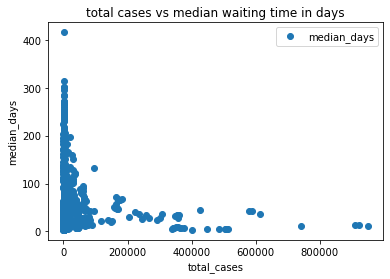

In [29]:
# creating a scatterplot to see how the variables behave inrelation to each other
df_wait.plot(x = 'total_cases', y='median_days',style='o') 
plt.title('total cases vs median waiting time in days')  
plt.xlabel('total_cases')  
plt.ylabel('median_days')  
plt.show()

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_wait['total_cases'].values.reshape(-1,1)
y = df_wait['median_days'].values.reshape(-1,1)

In [32]:
X

array([[ 477],
       [ 488],
       [ 542],
       ...,
       [1079],
       [1173],
       [1202]], dtype=int64)

In [33]:
y

array([[28],
       [29],
       [28],
       ...,
       [ 8],
       [ 7],
       [ 7]], dtype=int64)

In [34]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4.Regression Analysis

In [35]:
# creating a regression object
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [36]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train) # since we will be performing linear regression on the training set

LinearRegression()

In [38]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

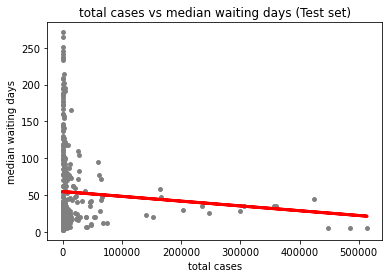

In [39]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('total cases vs median waiting days (Test set)')
plot_test.xlabel('total cases')
plot_test.ylabel('median waiting days')
plot_test.show()

In [40]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [41]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.49176883e-05]]
Mean squared error:  2859.049319069619
R2 score:  -0.011974225148628781


In [42]:
y_predicted

array([[54.93550623],
       [54.9684195 ],
       [54.83254678],
       [54.97419717],
       [54.63292488],
       [54.98296106],
       [54.96679655],
       [54.9229122 ],
       [54.9981518 ],
       [54.88876549],
       [54.7122543 ],
       [53.66688476],
       [55.00613667],
       [55.00762978],
       [55.00276095],
       [55.00464357],
       [54.88753206],
       [54.99795704],
       [54.95738349],
       [54.99549017],
       [54.62714721],
       [54.05937711],
       [54.98393482],
       [54.99133544],
       [54.94303668],
       [54.9482301 ],
       [41.79356941],
       [54.73776695],
       [53.37936432],
       [54.99308822],
       [54.98607711],
       [55.00496816],
       [51.40671053],
       [54.22589098],
       [54.98159779],
       [55.00749995],
       [54.25958326],
       [53.31165517],
       [54.86513545],
       [53.21771928],
       [54.8106046 ],
       [54.86020171],
       [54.98659645],
       [54.51152881],
       [54.97893616],
       [55

In [43]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,15,54.935506
1,146,54.968419
2,18,54.832547
3,26,54.974197
4,17,54.632925
5,105,54.982961
6,234,54.966797
7,25,54.922912
8,10,54.998152
9,25,54.888765


#### It is clear that the predictive model has missed by a long way.
#### the root mean square error is high and also the r2 value is very  less. 
#### This indicates that Accuracy of the predictive model is very less.

### Compare how the regression fits the training set

In [44]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [45]:
# defining rmse and r2
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [46]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.49176883e-05]]
Mean squared error:  3227.9338036040394
R2 score:  0.008317741980596982


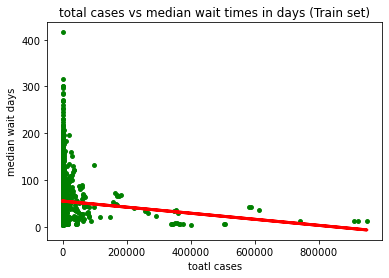

In [47]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('total cases vs median wait times in days (Train set)')
plot_test.xlabel('toatl cases')
plot_test.ylabel('median wait days')
plot_test.show()

### The mean square error is high and the r2 value is very low. This indicates that the accuracy of the model is very low.
### This could also be because of the outliers (the very high values of median_days).
### We shall try to see whether the performance of the model impproves after the outliers are removed

## Performance improvement after removing outliers

In [49]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_wait[df_wait['median_days'] <=200] 

In [50]:
df_test.shape

(1446, 7)

In [60]:
df_test.head()

,state,medical_procedure,year,%meeting_benchmark,median_days,maximum_days,total_cases
0,Alberta,Bladder Cancer Surgery,2013,NA,28,57,477
1,Alberta,Bladder Cancer Surgery,2014,NA,29,64,488
2,Alberta,Bladder Cancer Surgery,2015,NA,28,70,542
3,Alberta,Bladder Cancer Surgery,2016,NA,30,70,448
4,Alberta,Bladder Cancer Surgery,2017,NA,30,69,573


In [62]:
df_test.isnull().sum()

state                 0
medical_procedure     0
year                  0
%meeting_benchmark    0
median_days           0
maximum_days          0
total_cases           0
dtype: int64

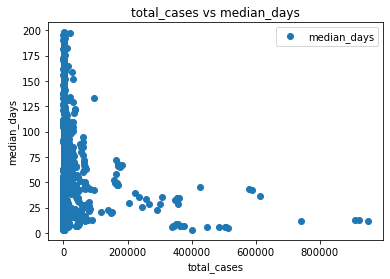

In [61]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'total_cases', y='median_days', style='o')  
plt.title('total_cases vs median_days')  
plt.xlabel('total_cases')  
plt.ylabel('median_days')  
plt.show()

In [52]:
# Reshape again.

X_2 = df_test['total_cases'].values.reshape(-1,1)
y_2 = df_test['median_days'].values.reshape(-1,1)

In [53]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [54]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [55]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [68]:
X_2

array([[ 477],
       [ 488],
       [ 542],
       ...,
       [1079],
       [1173],
       [1202]], dtype=int64)

In [69]:
y_2

array([[28],
       [29],
       [28],
       ...,
       [ 8],
       [ 7],
       [ 7]], dtype=int64)

In [70]:
y_test_2

array([[  7],
       [ 20],
       [ 19],
       [ 25],
       [  7],
       [ 18],
       [ 56],
       [137],
       [197],
       [ 68],
       [  7],
       [118],
       [ 24],
       [ 24],
       [160],
       [ 15],
       [ 14],
       [ 20],
       [ 22],
       [ 40],
       [  7],
       [ 33],
       [ 10],
       [ 33],
       [155],
       [ 47],
       [  6],
       [ 40],
       [118],
       [ 22],
       [ 93],
       [ 36],
       [ 17],
       [ 81],
       [ 19],
       [  7],
       [  6],
       [ 25],
       [ 13],
       [ 41],
       [ 18],
       [  8],
       [ 16],
       [ 85],
       [ 30],
       [  6],
       [ 62],
       [ 75],
       [124],
       [ 22],
       [ 15],
       [ 50],
       [ 25],
       [  7],
       [ 31],
       [ 35],
       [ 28],
       [ 19],
       [ 20],
       [ 14],
       [ 20],
       [  7],
       [ 25],
       [ 16],
       [ 63],
       [ 22],
       [152],
       [ 14],
       [ 25],
       [ 26],
       [ 23],
      

In [56]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)      # defining rmse and r2


In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.32265686e-05]]
Mean squared error:  1910.6099268355956
R2 score:  0.005531490132863359


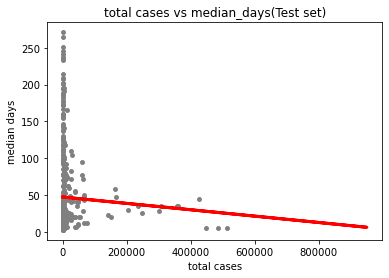

In [58]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('total cases vs median_days(Test set)')
plot_test.xlabel('total cases')
plot_test.ylabel('median days')
plot_test.show()

In [67]:
y_predicted_2

array([[46.97330042],
       [47.59425008],
       [47.57786721],
       [47.09169799],
       [31.8050975 ],
       [47.50148586],
       [47.5425511 ],
       [47.59325587],
       [47.59839983],
       [40.26890286],
       [47.61097876],
       [47.25271696],
       [47.60821226],
       [47.58616671],
       [47.58936548],
       [47.60267926],
       [47.58063371],
       [46.97269525],
       [47.59649786],
       [47.05888903],
       [47.44965721],
       [47.42501806],
       [47.33670618],
       [47.61430721],
       [47.52474176],
       [40.26267823],
       [47.59762175],
       [37.99068979],
       [47.38914001],
       [47.15204228],
       [47.44135771],
       [47.55417905],
       [47.60592125],
       [47.47995903],
       [45.6051363 ],
       [45.85978401],
       [25.88655896],
       [47.59511461],
       [47.56801155],
       [45.59653421],
       [46.96526028],
       [46.93772496],
       [47.60821226],
       [45.19457035],
       [47.59334232],
       [25

In [71]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,7,46.973300
1,20,47.594250
2,19,47.577867
3,25,47.091698
4,7,31.805098
5,18,47.501486
6,56,47.542551
7,137,47.593256
8,197,47.598400
9,68,40.268903


### It is obvious that the model is weak and the accuracy is very low.
### In other words we can say that there is little or no relation between the total number of cases and the 'median waiting days'

### We shall now try to work on a more stronger relationship.
### we will try exploring the relation between 'waiting_days' and '% meeting benchmark"

#### For this we shall use the benchmarked dataset "df_bm"  which is the subset of the main dataset "df.wait"

In [72]:
# Checking extreme values

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_days', ylabel='Density'>

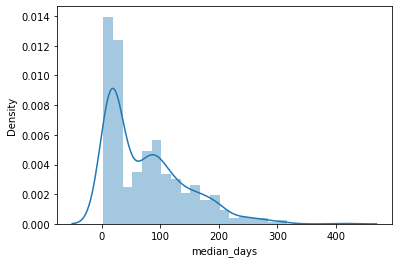

In [86]:
sns.distplot(df_bm['median_days'], bins=25)

In [87]:
df_bm['median_days'].mean()

75.60691421254802

In [88]:
df_bm['median_days'].median()

62.0

In [89]:
df_bm['median_days'].max()

416

## Data prep for regression analysis

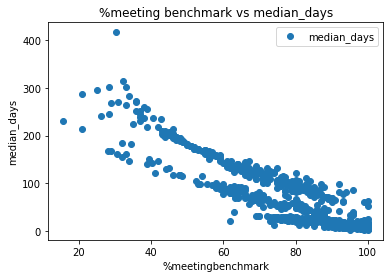

In [91]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_bm.plot(x = '%meeting_benchmark', y='median_days',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('%meeting benchmark vs median_days')  
plt.xlabel('%meetingbenchmark')  
plt.ylabel('median_days')  
plt.show()

#### From the scatterplot it is obvious that there is a strong relationship between the two variables

In [97]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_bm= df_bm['%meeting_benchmark'].values.reshape(-1,1)
y_bm= df_bm['median_days'].values.reshape(-1,1)

In [98]:
X_bm

array([[ 99.  ],
       [ 93.  ],
       [ 95.  ],
       [ 95.  ],
       [ 71.  ],
       [ 61.  ],
       [ 48.  ],
       [ 59.  ],
       [ 69.  ],
       [ 66.  ],
       [ 71.  ],
       [ 64.  ],
       [ 58.  ],
       [ 55.6 ],
       [ 48.7 ],
       [ 44.3 ],
       [ 34.6 ],
       [ 64.2 ],
       [ 80.  ],
       [ 81.  ],
       [ 81.  ],
       [ 80.  ],
       [ 85.  ],
       [ 82.  ],
       [ 86.  ],
       [ 91.  ],
       [ 92.3 ],
       [ 94.  ],
       [ 91.3 ],
       [ 92.55],
       [ 92.22],
       [ 73.  ],
       [ 74.  ],
       [ 74.  ],
       [ 76.  ],
       [ 75.  ],
       [ 79.  ],
       [ 86.  ],
       [ 88.5 ],
       [ 90.34],
       [ 86.66],
       [ 87.52],
       [ 86.87],
       [ 77.  ],
       [ 81.  ],
       [ 78.  ],
       [ 80.  ],
       [ 84.  ],
       [ 80.  ],
       [ 87.  ],
       [ 83.  ],
       [ 82.  ],
       [ 73.2 ],
       [ 70.1 ],
       [ 63.8 ],
       [ 48.9 ],
       [ 59.2 ],
       [ 72.  ],
       [ 71.  

In [99]:
y_bm

array([[  7],
       [ 17],
       [ 15],
       [ 15],
       [ 70],
       [ 88],
       [118],
       [ 88],
       [ 78],
       [ 79],
       [ 73],
       [ 87],
       [ 92],
       [ 99],
       [116],
       [131],
       [183],
       [ 73],
       [ 26],
       [ 23],
       [ 24],
       [ 24],
       [ 22],
       [ 23],
       [ 22],
       [ 20],
       [ 19],
       [ 17],
       [ 18],
       [ 18],
       [ 20],
       [ 31],
       [ 30],
       [ 30],
       [ 28],
       [ 30],
       [ 27],
       [ 25],
       [ 25],
       [ 24],
       [ 25],
       [ 24],
       [ 26],
       [103],
       [ 93],
       [104],
       [101],
       [ 90],
       [108],
       [ 90],
       [ 93],
       [ 91],
       [121],
       [129],
       [141],
       [187],
       [155],
       [123],
       [120],
       [128],
       [124],
       [104],
       [127],
       [ 99],
       [106],
       [113],
       [143],
       [131],
       [148],
       [217],
       [186],
      

In [100]:
# Split data into a training set and a test set.

X_train_bm, X_test_bm, y_train_bm, y_test_bm = train_test_split(X_bm, y_bm, test_size=0.3, random_state=0)

In [108]:
y_test_bm

array([[ 26],
       [195],
       [  8],
       [116],
       [  7],
       [ 14],
       [234],
       [136],
       [ 22],
       [141],
       [ 31],
       [ 20],
       [142],
       [ 72],
       [ 47],
       [ 13],
       [ 85],
       [ 54],
       [ 25],
       [ 27],
       [107],
       [302],
       [ 30],
       [ 13],
       [ 17],
       [ 83],
       [ 24],
       [ 62],
       [ 21],
       [225],
       [ 10],
       [ 88],
       [187],
       [  8],
       [190],
       [  8],
       [  7],
       [  3],
       [  8],
       [ 25],
       [133],
       [ 35],
       [ 12],
       [  7],
       [213],
       [ 78],
       [ 55],
       [ 19],
       [ 65],
       [ 10],
       [  9],
       [ 26],
       [ 10],
       [283],
       [146],
       [ 77],
       [  9],
       [  7],
       [203],
       [  6],
       [ 17],
       [ 17],
       [271],
       [ 21],
       [163],
       [119],
       [ 82],
       [ 25],
       [ 12],
       [ 77],
       [ 63],
      

## Regression Analysis

In [101]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_bm, y_train_bm)

LinearRegression()

In [102]:
# predict
y_predicted_bm = regression.predict(X_test_bm)

In [107]:
y_predicted_bm

array([[ 6.95844317e+01],
       [ 1.72086211e+02],
       [ 7.09141154e+00],
       [ 1.66465145e+02],
       [ 1.33737786e+01],
       [ 6.76076064e+00],
       [ 1.86469525e+02],
       [ 1.09262540e+02],
       [ 3.66846671e+01],
       [ 1.98538283e+02],
       [ 8.61169767e+01],
       [ 4.31323597e+01],
       [ 1.25861215e+02],
       [ 3.32128327e+01],
       [ 5.19938038e+01],
       [-3.15876636e+00],
       [ 1.12569049e+02],
       [ 7.95039587e+01],
       [ 5.96649047e+01],
       [ 4.97453777e+01],
       [ 7.61974497e+01],
       [ 2.33917929e+02],
       [ 6.62779227e+01],
       [ 2.32933056e+01],
       [ 1.66802876e+01],
       [ 4.64388687e+01],
       [ 3.87016376e+01],
       [ 2.99063237e+01],
       [ 3.92968092e+01],
       [ 2.11764319e+02],
       [ 1.47742639e-01],
       [ 5.96649047e+01],
       [ 1.65803844e+02],
       [ 6.76076064e+00],
       [ 1.66795796e+02],
       [ 3.15666583e+00],
       [ 6.76076064e+00],
       [ 1.47742639e-01],
       [ 3.4

In [103]:
rmse = mean_squared_error(y_test_bm, y_predicted_bm)
r2 = r2_score(y_test_bm, y_predicted_bm)

In [104]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.306509]]
Mean squared error:  888.3027006216414
R2 score:  0.8074142690350431


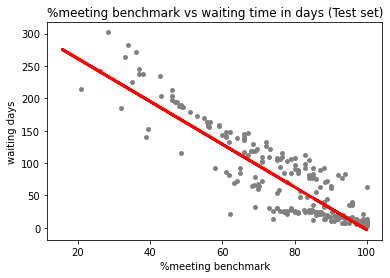

In [105]:
# Visualizing the test set results.
plot_bm = plt
plot_bm.scatter(X_test_bm, y_test_bm, color='gray', s = 15)
plot_bm.plot(X_train_bm, regression.predict(X_train_bm), color='red', linewidth =3)
plot_bm.title('%meeting benchmark vs waiting time in days (Test set)')
plot_bm.xlabel('%meeting benchmark')
plot_bm.ylabel('waiting days')
plot_bm.show()

### from the value and the scatter plot it is evident that there is strong negative relationship between the variables.
### the r2 value of 0.80 indicates that the model is strong and the accuracy is about 80%

In [110]:
data = pd.DataFrame({'Actual': y_test_bm.flatten(), 'Predicted': y_predicted_bm.flatten()})
data.head(30)

,Actual,Predicted
0,26,69.584432
1,195,172.086211
2,8,7.091412
3,116,166.465145
4,7,13.373779
5,14,6.760761
6,234,186.469525
7,136,109.262540
8,22,36.684667
9,141,198.538283


### Bonus:Performance improvement after removing outliers

In [112]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_testbm = df_bm[df_bm['median_days'] <=200]

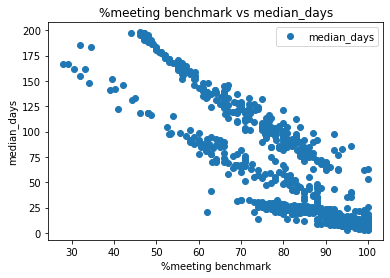

In [113]:
# See how the scatterplot looks without outliers.

df_testbm.plot(x = '%meeting_benchmark', y='median_days', style='o')  
plt.title('%meeting benchmark vs median_days')  
plt.xlabel('%meeting benchmark')  
plt.ylabel('median_days')  
plt.show()

In [114]:
# Reshape again.

X_bm2 = df_testbm['%meeting_benchmark'].values.reshape(-1,1)
y_bm2 = df_testbm['median_days'].values.reshape(-1,1)

In [115]:
X_train_bm2, X_test_bm2, y_train_bm2, y_test_bm2 = train_test_split(X_bm2, y_bm2, test_size=0.3, random_state=0)

In [116]:
X_bm2

array([[ 99.  ],
       [ 93.  ],
       [ 95.  ],
       [ 95.  ],
       [ 71.  ],
       [ 61.  ],
       [ 48.  ],
       [ 59.  ],
       [ 69.  ],
       [ 66.  ],
       [ 71.  ],
       [ 64.  ],
       [ 58.  ],
       [ 55.6 ],
       [ 48.7 ],
       [ 44.3 ],
       [ 34.6 ],
       [ 64.2 ],
       [ 80.  ],
       [ 81.  ],
       [ 81.  ],
       [ 80.  ],
       [ 85.  ],
       [ 82.  ],
       [ 86.  ],
       [ 91.  ],
       [ 92.3 ],
       [ 94.  ],
       [ 91.3 ],
       [ 92.55],
       [ 92.22],
       [ 73.  ],
       [ 74.  ],
       [ 74.  ],
       [ 76.  ],
       [ 75.  ],
       [ 79.  ],
       [ 86.  ],
       [ 88.5 ],
       [ 90.34],
       [ 86.66],
       [ 87.52],
       [ 86.87],
       [ 77.  ],
       [ 81.  ],
       [ 78.  ],
       [ 80.  ],
       [ 84.  ],
       [ 80.  ],
       [ 87.  ],
       [ 83.  ],
       [ 82.  ],
       [ 73.2 ],
       [ 70.1 ],
       [ 63.8 ],
       [ 48.9 ],
       [ 59.2 ],
       [ 72.  ],
       [ 71.  

In [117]:
y_bm2

array([[  7],
       [ 17],
       [ 15],
       [ 15],
       [ 70],
       [ 88],
       [118],
       [ 88],
       [ 78],
       [ 79],
       [ 73],
       [ 87],
       [ 92],
       [ 99],
       [116],
       [131],
       [183],
       [ 73],
       [ 26],
       [ 23],
       [ 24],
       [ 24],
       [ 22],
       [ 23],
       [ 22],
       [ 20],
       [ 19],
       [ 17],
       [ 18],
       [ 18],
       [ 20],
       [ 31],
       [ 30],
       [ 30],
       [ 28],
       [ 30],
       [ 27],
       [ 25],
       [ 25],
       [ 24],
       [ 25],
       [ 24],
       [ 26],
       [103],
       [ 93],
       [104],
       [101],
       [ 90],
       [108],
       [ 90],
       [ 93],
       [ 91],
       [121],
       [129],
       [141],
       [187],
       [155],
       [123],
       [120],
       [128],
       [124],
       [104],
       [127],
       [ 99],
       [106],
       [113],
       [143],
       [131],
       [148],
       [186],
       [ 14],
      

In [118]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_bm2, y_train_bm2)

LinearRegression()

In [119]:
# Predict.

y_predicted_bm2 = regression.predict(X_test_bm2)

In [120]:
y_predicted_bm2

array([[ 85.59183272],
       [ 77.50550111],
       [155.83251395],
       [ 83.32407921],
       [ 92.27573782],
       [128.08237226],
       [ 62.43687578],
       [ 23.64635514],
       [ 32.59801375],
       [ 20.66246893],
       [ 42.56419367],
       [ 32.59801375],
       [155.23573671],
       [ 62.07880944],
       [ 71.38853439],
       [ 50.50133097],
       [ 26.63024134],
       [101.22739643],
       [ 72.58208888],
       [  4.25109481],
       [ 89.29185162],
       [ 41.54967236],
       [134.05014467],
       [ 90.84347244],
       [ 74.3724206 ],
       [ 65.42076199],
       [ 11.71081032],
       [110.17905504],
       [ 38.56578615],
       [ 35.82061085],
       [ 95.25962402],
       [ 66.91270509],
       [ 50.50133097],
       [ 45.01098035],
       [ 20.66246893],
       [ 45.48840215],
       [134.05014467],
       [  8.45837436],
       [ 11.71081032],
       [ 20.66246893],
       [  5.74303792],
       [ 23.64635514],
       [  2.75915171],
       [ 71

In [121]:
rmse = mean_squared_error(y_test_bm2, y_predicted_bm2)
r2 = r2_score(y_test_bm2, y_predicted_bm2)

In [122]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.9838862]]
Mean squared error:  874.5205925727813
R2 score:  0.6885477125293488


#### As is evident that the coefficient that the slope has reduced from -3.3 to -2.9
#### the R2 is 0.68 which is good accuracy

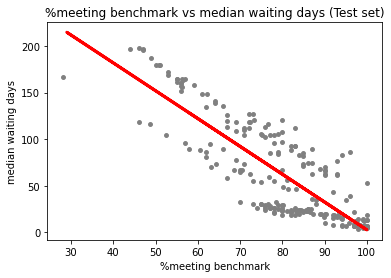

In [123]:
# Visualizing the test set results.
plot_testbm = plt
plot_testbm.scatter(X_test_bm2, y_test_bm2, color='gray', s = 15)
plot_testbm.plot(X_train_bm2, regression.predict(X_train_bm2), color='red', linewidth =3)
plot_testbm.title('%meeting benchmark vs median waiting days (Test set)')
plot_testbm.xlabel('%meeting benchmark')
plot_testbm.ylabel('median waiting days')
plot_testbm.show()

In [124]:
data = pd.DataFrame({'Actual': y_test_bm2.flatten(), 'Predicted': y_predicted_bm2.flatten()})
data.head(30)

,Actual,Predicted
0,118,85.591833
1,106,77.505501
2,116,155.832514
3,31,83.324079
4,67,92.275738
5,90,128.082372
6,19,62.436876
7,63,23.646355
8,10,32.598014
9,17,20.662469


#### We can thus infer that there is a strong negative relationship between  '%meeting benchmark' and 'median_days'
#### Although the model is predicting only with r2 of 0.68 i.e  68%.
#### For now it can be seen that the median waiting days decrease and the % of meeting the benchmark increases.